In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer

In [2]:
house=pd.read_csv(r'https://raw.githubusercontent.com/CodyDong/schulich_data_science/main/Dataset/kc_house_data.csv')

In [3]:
house.info()
house.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [5]:
house['grade'].describe()

count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [6]:
house['date'] = pd.to_datetime(house['date'])
house['yr_built'] = pd.to_datetime(house['yr_built'])

<Axes: ylabel='bedrooms'>

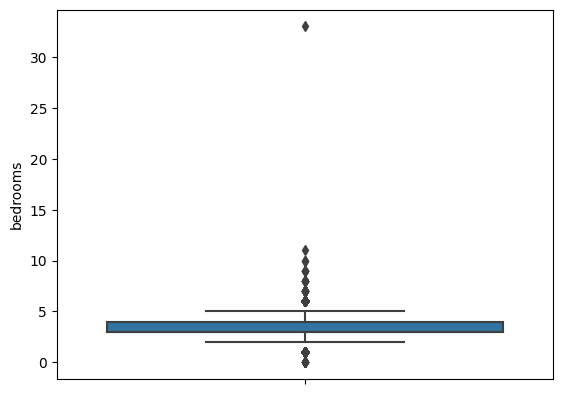

In [7]:
sns.boxplot(data=house,y='bedrooms')

<Axes: ylabel='bathrooms'>

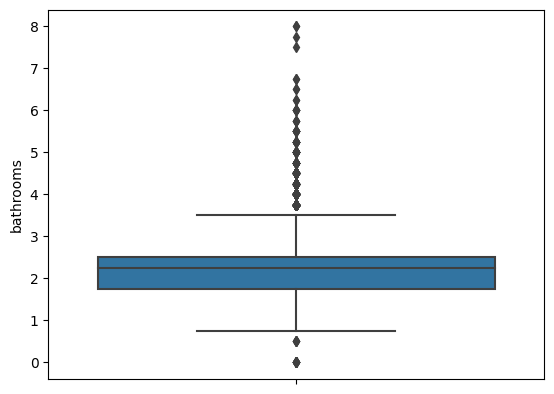

In [8]:
sns.boxplot(data=house,y='bathrooms')

<Axes: ylabel='sqft_living'>

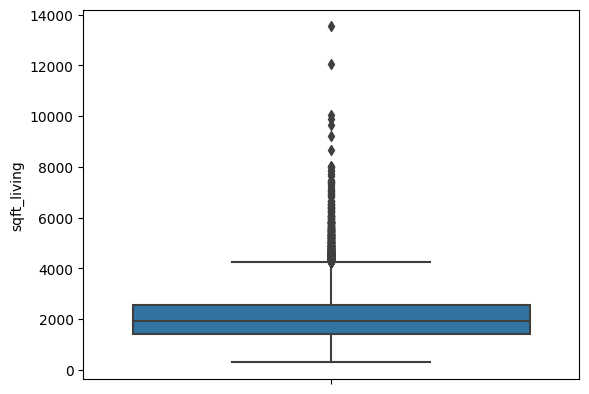

In [9]:
sns.boxplot(data=house,y='sqft_living')

<Axes: ylabel='price'>

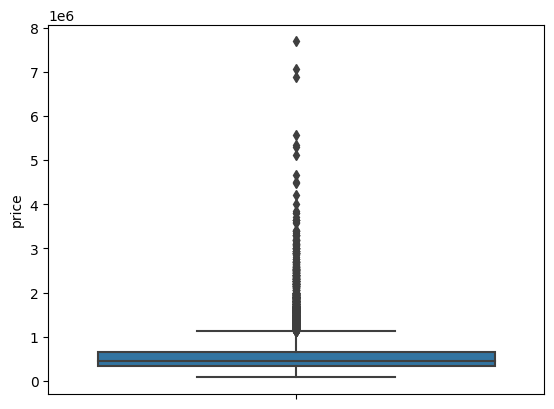

In [10]:
sns.boxplot(data=house,y='price')

<Axes: xlabel='sqft_living', ylabel='price'>

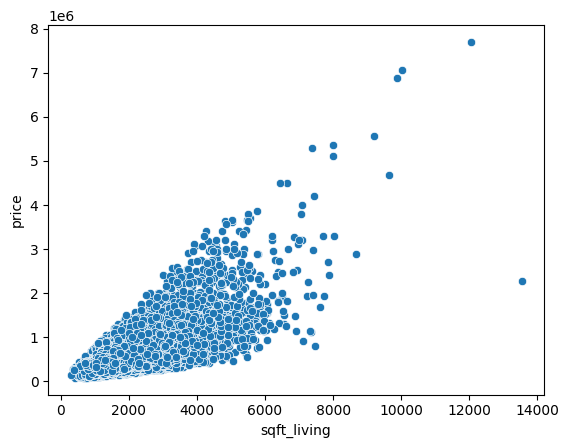

In [11]:
sns.scatterplot(data= house, y= 'price',x='sqft_living')

<Axes: xlabel='sqft_lot', ylabel='price'>

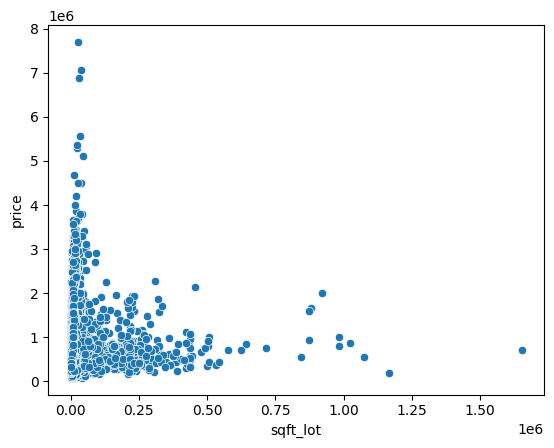

In [12]:
sns.scatterplot(data= house, y= 'price',x='sqft_lot')

In [13]:
house['built_yrs']= (house['date'] -house['yr_built'])/np.timedelta64(1,'Y')
house['built_yrs']

0        44.810959
1        44.967123
2        45.180822
3        44.967123
4        45.161644
           ...    
21608    44.413699
21609    45.175342
21610    44.504110
21611    45.071233
21612    44.816438
Name: built_yrs, Length: 21613, dtype: float64

<Axes: xlabel='built_yrs', ylabel='price'>

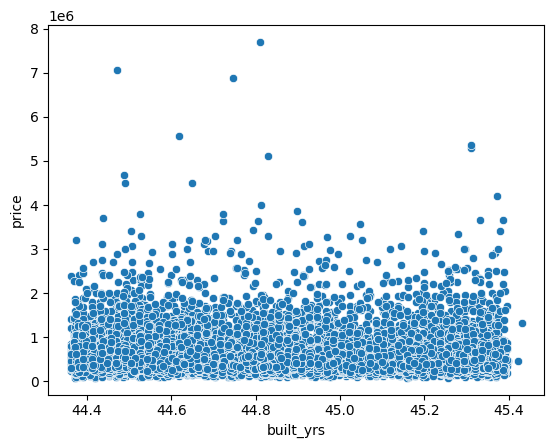

In [14]:
sns.scatterplot(data= house, y= 'price',x='built_yrs')

<Axes: xlabel='zipcode', ylabel='price'>

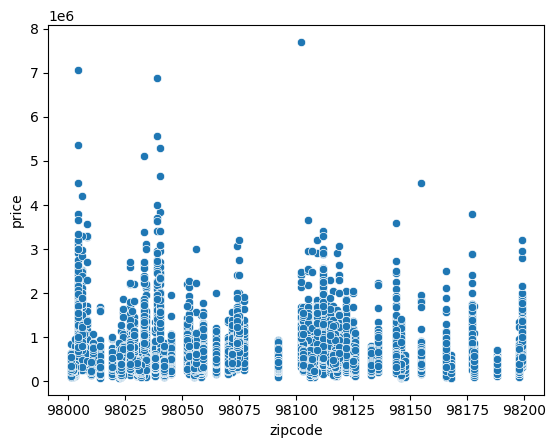

In [15]:
sns.scatterplot(data= house, y= 'price',x='zipcode')

<Axes: xlabel='long', ylabel='lat'>

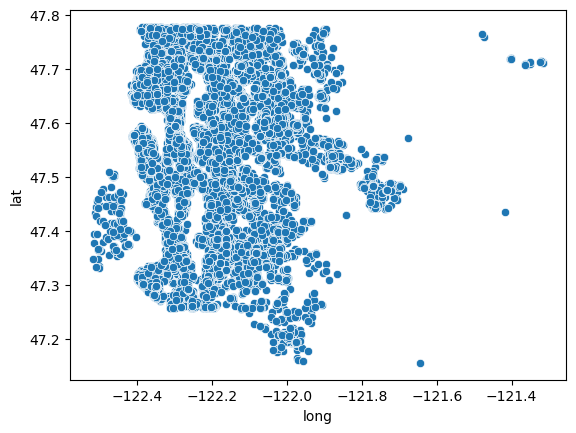

In [16]:
sns.scatterplot(data= house, y= 'lat',x='long')

In [17]:
house.drop(house[house['bedrooms']>30].index, inplace=True)

In [18]:
house.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,built_yrs
count,2.161200e+04,21612,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,...,21612.000000,21612.000000,21612,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,2014-10-29 04:46:26.451971328,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,...,1788.425319,291.495697,1970-01-01 00:00:00.000001971,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984,44.855339
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1970-01-01 00:00:00.000001900,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,44.361644
25%,2.123049e+09,2014-07-22 00:00:00,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,...,1190.000000,0.000000,1970-01-01 00:00:00.000001951,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000,44.583562
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1970-01-01 00:00:00.000001975,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,44.819178
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,...,2210.000000,560.000000,1970-01-01 00:00:00.000001997,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000,45.158904
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,9410.000000,4820.000000,1970-01-01 00:00:00.000002015,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,45.430137
std,2.876594e+09,NaN,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,...,828.094487,442.580931,NaN,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179,0.309719


In [19]:
house['condition'].describe()

count    21612.000000
mean         3.409356
std          0.650668
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [20]:
house['waterfront'].describe()

count    21612.000000
mean         0.007542
std          0.086519
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [21]:
house['year'] = house['date'].dt.year
house['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: year, Length: 21612, dtype: int32

In [22]:
house['month'] = house['date'].dt.month
house['month']

0        10
1        12
2         2
3        12
4         2
         ..
21608     5
21609     2
21610     6
21611     1
21612    10
Name: month, Length: 21612, dtype: int32

<Axes: xlabel='month', ylabel='price'>

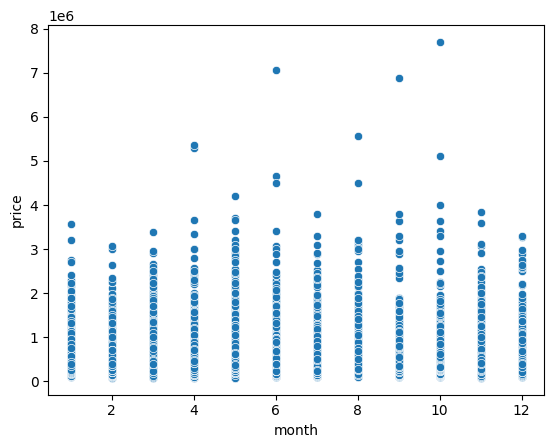

In [23]:
sns.scatterplot(data= house, y= 'price',x='month')

<Axes: xlabel='price', ylabel='Count'>

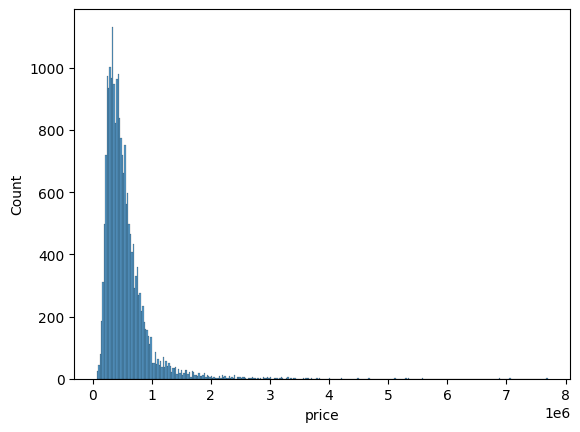

In [24]:
sns.histplot(house['price'])

<Axes: xlabel='sqft_lot', ylabel='Count'>

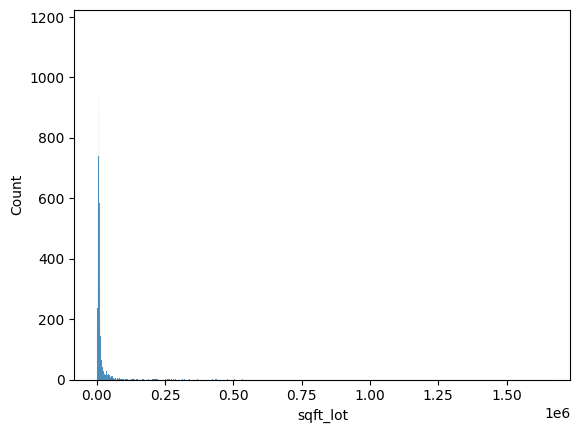

In [25]:
sns.histplot(house['sqft_lot'])

<Axes: xlabel='sqft_living', ylabel='Count'>

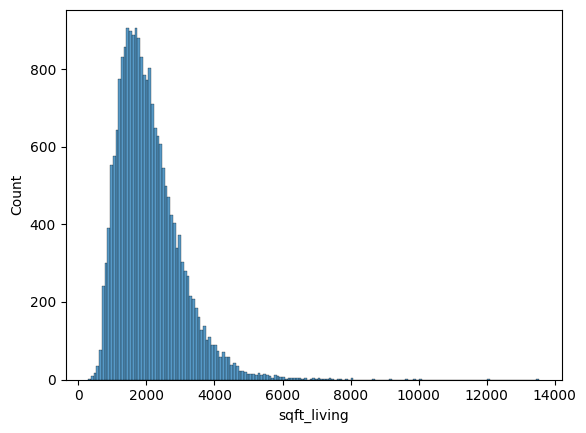

In [26]:
sns.histplot(house['sqft_living'])

<Axes: xlabel='bedrooms', ylabel='Count'>

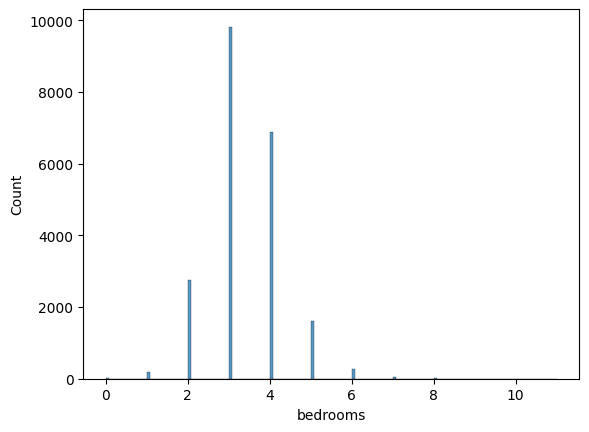

In [27]:
sns.histplot(house['bedrooms'])

<Axes: xlabel='sqft_living', ylabel='bedrooms'>

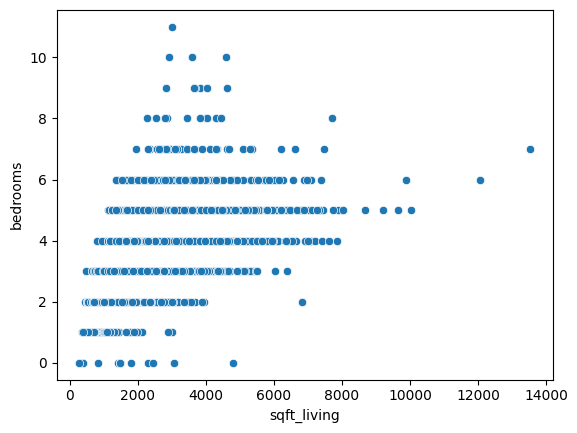

In [28]:
sns.scatterplot(data= house, y= 'bedrooms',x='sqft_living')

In [29]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21612 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21612 non-null  int64         
 1   date           21612 non-null  datetime64[ns]
 2   price          21612 non-null  float64       
 3   bedrooms       21612 non-null  int64         
 4   bathrooms      21612 non-null  float64       
 5   sqft_living    21612 non-null  int64         
 6   sqft_lot       21612 non-null  int64         
 7   floors         21612 non-null  float64       
 8   waterfront     21612 non-null  int64         
 9   view           21612 non-null  int64         
 10  condition      21612 non-null  int64         
 11  grade          21612 non-null  int64         
 12  sqft_above     21612 non-null  int64         
 13  sqft_basement  21612 non-null  int64         
 14  yr_built       21612 non-null  datetime64[ns]
 15  yr_renovated   21612 non

In [45]:
results = ols("price ~ sqft_living +grade+ bedrooms + waterfront + lat + long ", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     6731.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:02:31   Log-Likelihood:            -2.9620e+05
No. Observations:               21612   AIC:                         5.924e+05
Df Residuals:                   21605   BIC:                         5.925e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.536e+07   1.36e+06    -48.153      

In [37]:
house_df = house[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','zipcode','lat','long','sqft_living15','sqft_lot15']]

In [38]:
scaler = StandardScaler()
df_std = scaler.fit_transform(house_df)
pca = PCA()
df_pca = pca.fit_transform(df_std)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(house_df.columns))])
print('Explained variance ratio:', pca.explained_variance_ratio_)
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)
df_pca.head()

Explained variance ratio: [0.30708443 0.13557756 0.1073773  0.08183995 0.07483731 0.06042663
 0.04608174 0.04353204 0.03376934 0.02787218 0.02164309 0.01903071
 0.01726594 0.01479015 0.00887164]
Cumulative explained variance ratio: [0.30708443 0.44266199 0.55003929 0.63187924 0.70671654 0.76714317
 0.81322491 0.85675695 0.89052629 0.91839847 0.94004156 0.95907227
 0.97633821 0.99112836 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-2.592662,-0.482414,0.331406,0.626080,0.319615,0.523880,-0.915819,-0.069685,0.119417,-1.039417,-0.038316,0.441788,-0.388318,-0.471387,-0.062351
1,-0.260579,-1.206013,-0.282535,1.482769,0.162397,0.021277,0.301455,0.426804,-0.146977,0.096170,0.132263,-0.179543,0.017027,0.602845,0.749056
2,-2.167997,0.514245,0.071431,0.306582,0.374981,-2.117189,-0.794015,-0.358123,0.134973,0.286319,-1.105871,-0.497486,1.159337,0.998741,-0.240027
3,-0.794467,-1.163987,0.662046,-1.039716,-2.159230,1.449390,0.893440,0.414153,0.175361,-0.104948,1.137888,-0.402798,0.141540,0.075920,-0.409524
4,-0.418556,0.475749,-0.358004,0.096374,0.211385,-1.169293,-0.735986,0.080437,-0.004566,-0.431565,0.659740,0.121030,-0.167787,-0.571389,-0.256914
